In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
var_df = pd.read_csv("../Results/all_components_performance.csv", index_col=0)

# Plotting Graph for Training

In [3]:
train_var_disfa = var_df[(var_df["Train_Name"]=="DISFA_train") & (var_df["Test_Name"]=="DISFA_train")]['Var_Explained']
train_var_disfa = np.array(train_var_disfa)

train_var_bp4d = var_df[(var_df["Train_Name"]=="BP4D_train") & (var_df["Test_Name"]=="BP4D_train")]['Var_Explained']
train_var_bp4d = np.array(train_var_bp4d)

train_var_ck = var_df[(var_df["Train_Name"]=="CK+") & (var_df["Test_Name"]=="CK+")]['Var_Explained']
train_var_ck = np.array(train_var_ck)

# Plotting Graph for Test

In [4]:
train_data = ["DISFA_train", "BP4D_train", "CK+"]

test_data = [["BP4D_full","CK+"],["DISFA_full","CK+"],["DISFA_full","BP4D_full"]]


test_list = []
for train,test in zip(train_data, test_data):
    temp1 = np.array(var_df[(var_df["Train_Name"]==train) & (var_df["Test_Name"]==test[0])]['Var_Explained'])
    temp2 = np.array(var_df[(var_df["Train_Name"]==train) & (var_df["Test_Name"]==test[1])]['Var_Explained'])
    temp = (temp1+temp2)/2
    test_list.append(temp)

In [5]:
# Define the tick formatter function
import matplotlib.ticker as ticker

def exp_formatter(x, pos):
    """
    Return the exponential notation of x.
    """
    return '{:d}'.format(round(np.exp(x)))

# Set the x-axis tick formatter

In [6]:
x = np.log(np.arange(1, 137, 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: color is redundantly defined by th

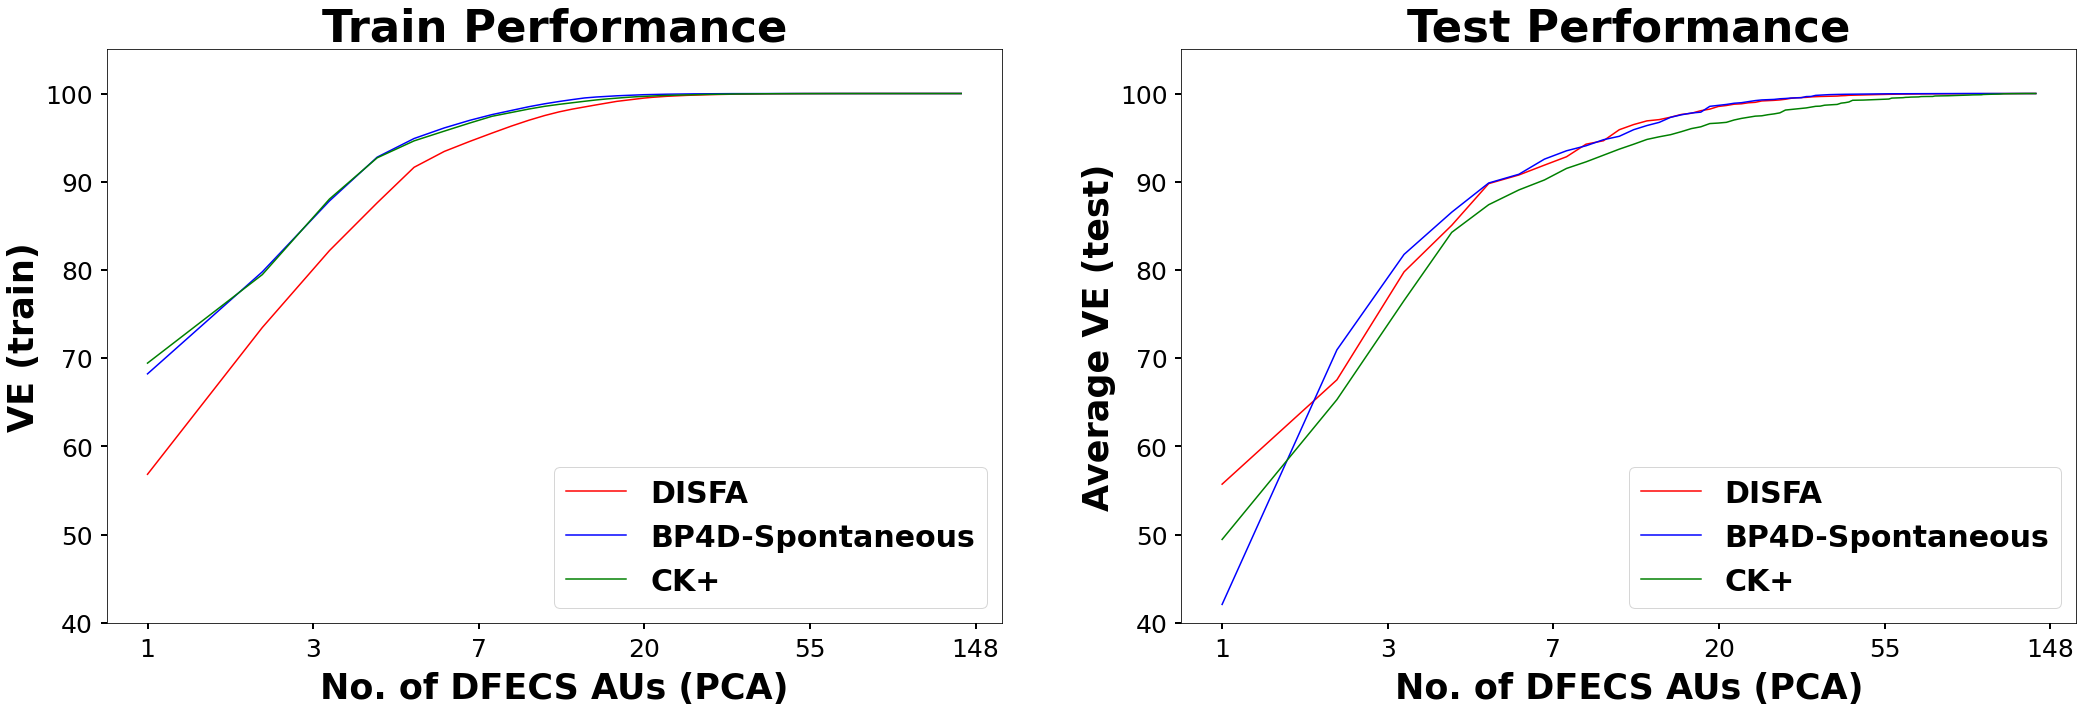

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some data for the plots
# x = np.linspace(0, 2*np.pi, 100)
stop = 136

# Create the first plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
plt.subplots_adjust(wspace=4)
# wspace adjusts the padding between figures

# Set the same y-ticks on both subplots
y_ticks = [40, 50, 60, 70, 80, 90, 100]  # Example y-tick values
ax1.set_yticks(y_ticks)
ax2.set_yticks(y_ticks)

# Set the same y-axis scaling on both subplots
ax1.set_ylim(min(y_ticks), max(y_ticks)+5)
ax2.set_ylim(min(y_ticks), max(y_ticks)+5)


ax1.xaxis.set_major_formatter(ticker.FuncFormatter(exp_formatter))
ax1.plot(x[:stop], train_var_disfa[:stop], 'b-', color='r', label='DISFA')
# ax1.legend()
ax1.plot(x[:stop], train_var_bp4d[:stop], 'b-', color='b', label='BP4D-Spontaneous')
# ax1.legend()
ax1.plot(x[:stop], train_var_ck[:stop], 'b-', color='g', label='CK+')
# ax1.legend()
ax1.set_title('Train Performance',fontsize=45, fontweight='bold')
ax1.set_xlabel('No. of DFECS AUs (PCA)',fontsize=35, fontweight='bold', labelpad=10)
ax1.set_ylabel('VE (train)', fontsize=35, fontweight='bold')
# ax1.set_yticks(fontsize=20, fontweight='bold')
ax1.tick_params(axis='x', labelsize=25, width=2, length=6, pad=8)
ax1.tick_params(axis='y', labelsize=25, width=2, length=6, pad=8)
# for tick in ax1.xaxis.get_major_ticks() + ax1.yaxis.get_major_ticks():
#     tick.label.set_fontweight('bold')
# ax1.axhline(y=95, color='black', linestyle='--')
# ax1.annotate('95', xy=(0, 95), xytext=(-10, 5), textcoords='offset points', ha='right', va='bottom', color='red', fontsize=15, fontweight='bold')

ax1.legend(loc='lower right', prop={'weight': 'bold', 'size': 30})

# Create the second plot
# ax2 = ax1.twinx()
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(exp_formatter))
ax2.plot(x[:stop], test_list[0][:stop], 'b-', color='r', label='DISFA')
ax2.plot(x[:stop], test_list[1][:stop], 'b-', color='b', label='BP4D-Spontaneous')
ax2.plot(x[:stop], test_list[2][:stop], 'b-', color='g', label='CK+')
ax2.set_title('Test Performance', fontsize=45, fontweight='bold')
ax2.set_xlabel('No. of DFECS AUs (PCA)', fontsize=35, fontweight='bold', labelpad=10)
# labelpad add spacing between xticks and xcaption
ax2.set_ylabel('Average VE (test)', fontsize=35, fontweight='bold')
ax2.tick_params(axis='x', labelsize=25, width=2, length=6, pad=8)
ax2.tick_params(axis='y', labelsize=25, width=2, length=6, pad=8)
# for tick in ax2.xaxis.get_major_ticks() + ax2.yaxis.get_major_ticks():
#     tick.label.set_fontweight('bold')
# ax2.axhline(y=95, color='black', linestyle='--')
# ax2.annotate('95', xy=(0, 95), xytext=(-10, 5), textcoords='offset points', ha='right', va='bottom', color='red', fontsize=15, fontweight='bold')
# ax2.tick_params('y', colors='r')
ax2.legend(loc='lower right', prop={'weight': 'bold', 'size': 30})

# Adjust the layout and save the figure
fig.tight_layout()
plt.savefig('../Results/pca_train_test_plot.jpg')
plt.savefig('../Results/pca_train_test_rs17.pdf', dpi=300)